In [1]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import re

In [2]:
# Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по направлениям
sleep_south = sleep_df[sleep_df['south']==1] # Датафрейм для юга
sleep_north = sleep_df[sleep_df['south']==0] # Датафрейм для севера

In [3]:
sleep_south

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,sleep60
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,48.666667
43,49,0,44,0.000000,0.000000,12,0,0,1,2884,...,3268,0,3268,0,31,0,30,6.080001,2401,65.466667
46,36,0,47,0.000000,0.000000,12,16250,1,1,3564,...,3188,1,2363,825,18,0,15,5.770000,1296,55.466667
47,36,0,48,0.000000,0.000000,9,18750,1,1,4730,...,1555,1,1555,0,21,0,18,7.420000,1296,63.250000
48,37,0,49,0.000000,0.000000,12,0,1,1,3974,...,2743,0,2743,0,19,0,17,4.329998,1369,56.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,31,0,690,0.182331,0.030075,12,10500,1,0,4639,...,2373,0,2373,0,13,0,0,NaN,961,51.133333
698,52,0,699,0.182331,0.030075,10,0,0,0,4797,...,2275,0,2275,0,36,0,29,NaN,2704,50.133333
700,32,0,701,0.182331,0.030075,16,10500,1,0,4707,...,2388,0,2388,0,10,0,0,NaN,1024,49.750000
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,49.500000


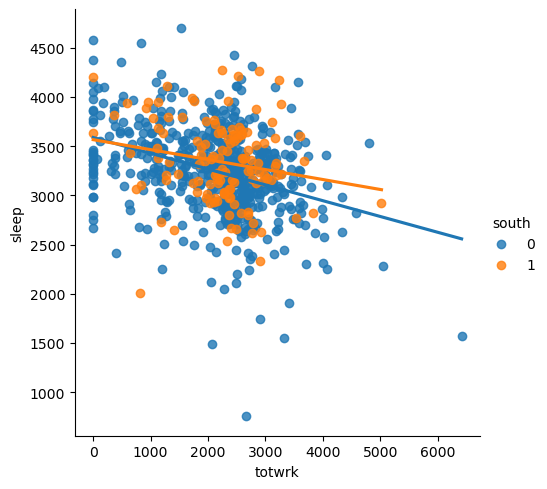

In [4]:
sns.lmplot(data = sleep_df, x = 'totwrk', y = 'sleep', ci = None, hue = 'south')

In [6]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+smsa +male').fit()
slp_so = smf.ols(data= sleep_south, formula='sleep60~totwrk+age+I(age**2)+smsa +male').fit()
slp_no = smf.ols(data= sleep_north, formula='sleep60~totwrk+age+I(age**2)+smsa +male').fit()

In [8]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_so.ssr.round(2)},RSS_2:{slp_no.ssr.round(2)} ')

RSS:33860.55, RSS_1:5462.29,RSS_2:27640.21 


In [24]:
F_obs =( slp.ssr - (slp_so.ssr + slp_no.ssr) )/((slp_so.ssr + slp_no.ssr)) * (len( sleep_north ) + len( sleep_south) - 12) / 6
F_obs

2.648786118874698

In [25]:
alpha = 0.05
stats.f.ppf(1-alpha,6,len( sleep_north ) + len( sleep_south) - 12  )

2.111625879316394

Вывод:
$$
F_(obs)>F_(cr)
$$
данные согласуются с гипотизой Н1. Структурные изменения значимы